# Interactive Match Parameter File

This notebook is aimed to show how to interactively use match/scripts/match_param.py to make a paramater file to use with CALCSFH. (For details on the parameter file, see the MATCH README.)

## Requirements

Photometry is the only required input to run this code. It can either be a binary fits table or a CALCSFH-ready 2-column ascii file containing mag1 and mag2.

(Note: <code>!</code> will execute in a bash shell, you do not need ipython or a notebook to run this code)


In [1]:
from IPython.core.display import Image

In [2]:
# View all options:
! python -m match.scripts.match_param -h

usage: match_param.py [-h] [--imf IMF] [--bf BF] [--tbin TBIN] [--vstep VSTEP]
                      [--vistep VISTEP] [--tmin TMIN] [--tmax TMAX]
                      [--vmax VMAX] [--imax IMAX] [--zinc] [--dmod DMOD DMOD]
                      [--av AV AV] [--dav DAV] [--ddmod DDMOD] [-s SLICE] [-i]
                      [-f FILTERS] [--fake FAKE] [-c COMP_FRAC]
                      [-b BRIGHT_LIM] [-p PARAM] [--hstflag HSTFLAG]
                      [--overwrite] [--max_tbins MAX_TBINS] [--phot PHOT]

make calcsfh param file

optional arguments:
  -h, --help            show this help message and exit
  --imf IMF             IMF power law (None if using calcsfh flag)
  --bf BF               Binary fraction [0.0]
  --tbin TBIN           age bin width(s) [0.05]
  --vstep VSTEP         mag step size [0.15]
  --vistep VISTEP       color step size [0.05]
  --tmin TMIN           min log age [6.6]
  --tmax TMAX           max log age [10.24]
  --vmax VMAX           faint V limit
  --imax I

## Only the photometry file
Note: This code wil not overwrite a parameter file. If the default name scheme is found, it will do nothing but plot it up.

In [4]:
! python -m match.scripts.match_param --phot 9891_NGC1978_F555W_F814W.gst.match

9891_NGC1978_F555W_F814W.gst.param file found, not overwriting
wrote 9891_NGC1978_F555W_F814W.gst.param.png


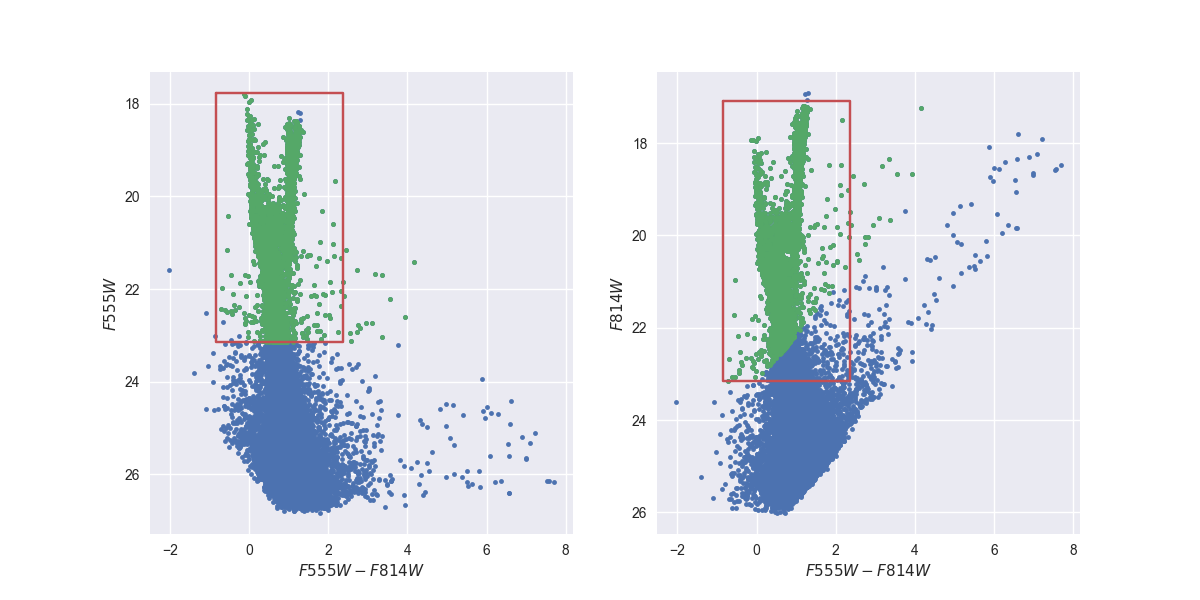

In [5]:
# So we can compare images, change the name.
! mv 9891_NGC1978_F555W_F814W.gst.param.png 9891_NGC1978_F555W_F814W.gst.param_phot_only.png
Image('9891_NGC1978_F555W_F814W.gst.param_phot_only.png')

## With completeness as a limit

In [6]:
! rm 9891_NGC1978_F555W_F814W.gst.param
! python -m match.scripts.match_param --phot 9891_NGC1978_F555W_F814W.gst.match --fake=9891_NGC1978_F555W_F814W.gst.matchfake -c 0.7

Making param file
filters set to F555W, F814W
assuming HST instrument: WFPC2
Using 0.700000 completeness fraction from 9891_NGC1978_F555W_F814W.gst.matchfake
From completeness: vmax=26.003000000007336 imax=24.882000000005966
Overwrote vimin vimax with values from matchfake
wrote 9891_NGC1978_F555W_F814W.gst.param
wrote 9891_NGC1978_F555W_F814W.gst.param.png


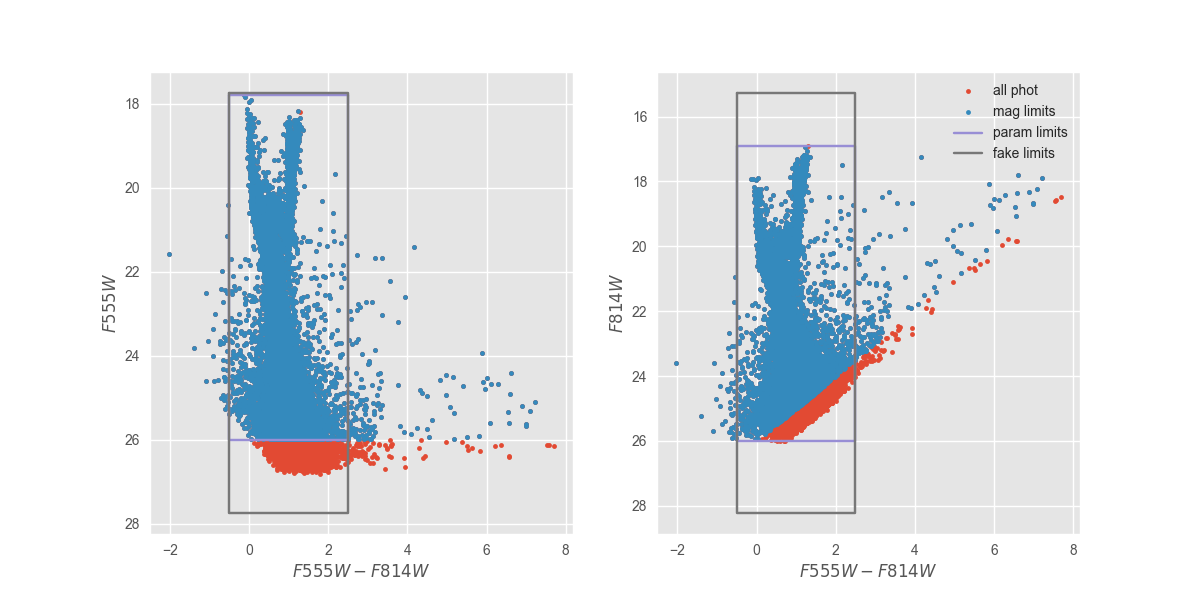

In [7]:
! mv 9891_NGC1978_F555W_F814W.gst.param.png 9891_NGC1978_F555W_F814W.gst.param_0.7c.png
! rm 9891_NGC1978_F555W_F814W.gst.param
Image('9891_NGC1978_F555W_F814W.gst.param_0.7c.png')

## Find Mag/Color Limits Interactively

The interactive method allows you to click on a plot and it will record your x,y values. The order of clicks doesn't matter. You are able to re-do the selection by not entering "0" after you click. For the color selection, click the min and max color, for the mag selection you will have a mag1 vs mag2 plot and you only need to click twice and both mags will be recorded. 

raw_input doesn't seem to work in the notebook. You'll need to run this step in a terminal.

<code> python -m match.scripts.match_param --phot 9891_NGC1978_F555W_F814W.gst.match -i </code>

#### If you only care to interactivly find the color:
(This is no longer supported...) 

For example, you are using the full data to set the mag limits, or you are using --fake to find completeness limit.

<code> python -m match.scripts.match_param --phot 9891_NGC1978_F555W_F814W.gst.match -xi </code>

## Interactively set an exclude gate
(This is no longer supported...)

This is a pretty basic means to add only one exclude gate. With the <code> -e </code> flag, you click the four corners of a parallelagram for an exclude gate. You can do this after making a parameter file, it will backup the current one and add the exclude gates line.

<code> python -m match.scripts.match_param --phot 9891_NGC1978_F555W_F814W.gst.match -e </code>

(The exclude gate will be approximately plotted with the diagnostic plot.) 

Or it can be combined with everything else:

<code> python -m match.scripts.match_param --phot 9891_NGC1978_F555W_F814W.gst.match --fake=9891_NGC1978_F555W_F814W.gst.matchfake -c 0.9 -ie </code>